In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [2]:
data_train_path = 'DataSet/train'
data_test_path ='DataSet/test'
data_val_path ='DataSet/validation'

In [3]:
img_width = 180
img_height = 180

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 1925 files belonging to 22 classes.


In [5]:
data_cat = data_train.class_names

In [6]:
data_cat

['beetroot',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'corn',
 'eggplant',
 'garlic',
 'ginger',
 'lemon',
 'lettuce',
 'onion',
 'pear',
 'peas',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip']

In [7]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                 image_size=(img_height,img_width),
                                                 batch_size = 32,
                                                 shuffle=False,
                                                 validation_split=False)

Found 217 files belonging to 22 classes.


In [8]:
data_test = tf.keras.utils.image_dataset_from_directory(data_test_path,
                                                        image_size=(img_height,img_width),
                                                        batch_size = 32,
                                                        shuffle=False,
                                                        validation_split=False)

Found 220 files belonging to 22 classes.


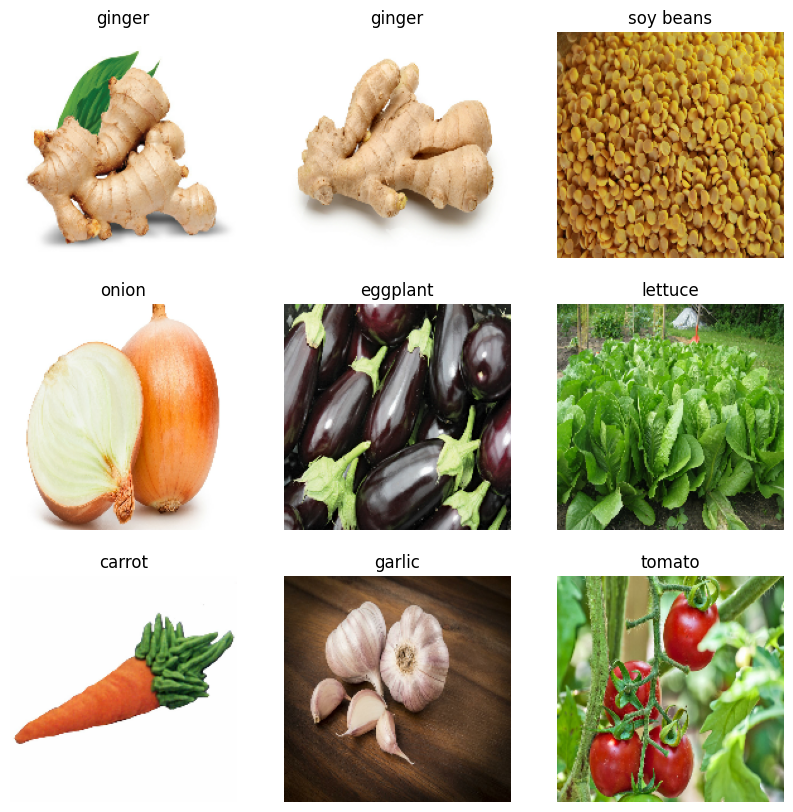

In [9]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
    

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
epochs_size = 100
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/100


61/61 [==============================] - 16s 222ms/step - loss: 2.9928 - accuracy: 0.1418 - val_loss: 1.7166 - val_accuracy: 0.4562
Epoch 2/100
61/61 [==============================] - 14s 213ms/step - loss: 1.8698 - accuracy: 0.3901 - val_loss: 1.1888 - val_accuracy: 0.6452
Epoch 3/100
61/61 [==============================] - 15s 219ms/step - loss: 1.4879 - accuracy: 0.5148 - val_loss: 0.8439 - val_accuracy: 0.7696
Epoch 4/100
61/61 [==============================] - 14s 212ms/step - loss: 1.1414 - accuracy: 0.6306 - val_loss: 0.6587 - val_accuracy: 0.8341
Epoch 5/100
61/61 [==============================] - 14s 210ms/step - loss: 0.8273 - accuracy: 0.7517 - val_loss: 0.5120 - val_accuracy: 0.8571
Epoch 6/100
61/61 [==============================] - 14s 215ms/step - loss: 0.5800 - accuracy: 0.8244 - val_loss: 0.4414 - val_accuracy: 0.9078
Epoch 7/100
61/61 [==============================] - 14s 214ms/step - loss: 0.4105 - accuracy: 0.8753 - val_loss: 0.5511 - val_accurac

Text(0.5, 1.0, 'Loss')

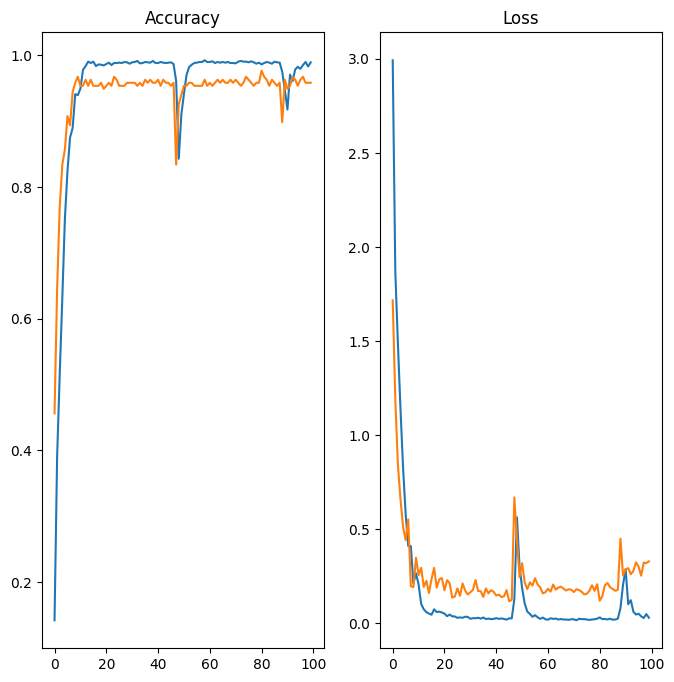

In [15]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'], label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label = 'Validation Accuracy' )
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'], label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label = 'Validation Loss' )
plt.title('Loss')


In [21]:
image = 'test1.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height, img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [22]:
predict = model.predict(img_bat)

1/1 [==============================] - 0s 22ms/step


In [23]:
score = tf.nn.softmax(predict)

In [24]:
print('Vegitable in the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Vegitable in the image is corn with accuracy of 81.72


In [20]:
model.save('Image_classification.keras')